***.....K MEAN ALGO......***

In [54]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import silhouette_score

In [55]:
iris = datasets.load_iris()
x = iris.data
y= iris.target
xdf = pd.DataFrame(x, columns = [['s_length', 's_width','p_length','p_width']])
ydf = pd.DataFrame(y, columns = [['Species']])

In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [57]:
# Define the number of clusters
n_clusters = 3

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_scaled)



KMeans(n_clusters=3, random_state=0)

In [58]:
# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_
print(centers)
print(labels)
xdf['cluster_num']= labels
df = xdf.join(ydf)

[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


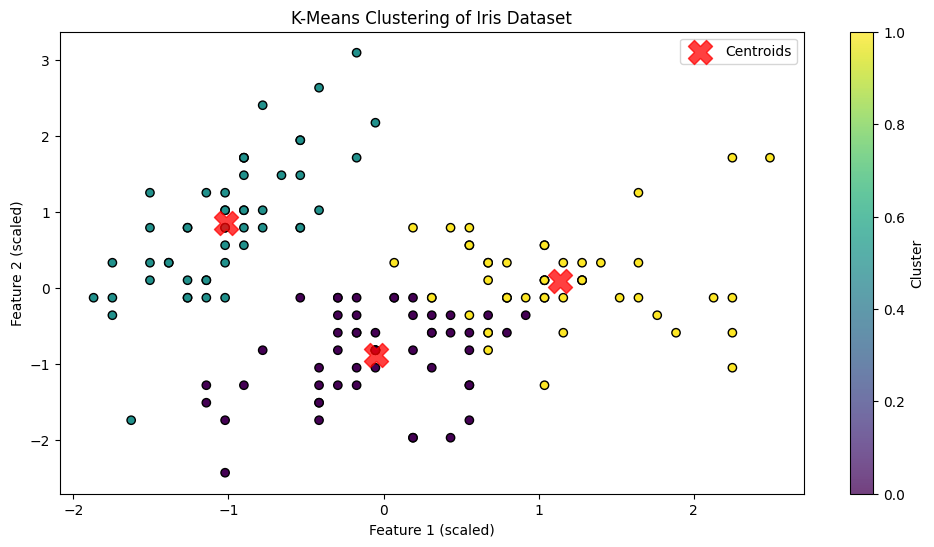

In [59]:
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.75, marker='X', label='Centroids')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('K-Means Clustering of Iris Dataset')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()


In [60]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')



Silhouette Score: 0.46


In [61]:
user_input = np.array([[9, 4.8, 6.5, 4.8]]) 
user_input_scaled = scaler.transform(user_input) 
predicted_cluster = kmeans.predict(user_input_scaled)
print(f'Predicted Cluster for input {user_input[0]}: {predicted_cluster[0]}')


Predicted Cluster for input [9.  4.8 6.5 4.8]: 2


In [63]:
df

,s_length,s_width,p_length,p_width,cluster_num,Species
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,0,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [75]:
df1 = df[df['cluster_num']==1]
df1.shape[0]
df1

,s_length,s_width,p_length,p_width,cluster_num,Species
0,NaN,NaN,NaN,NaN,1.0,NaN
1,NaN,NaN,NaN,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,1.0,NaN
3,NaN,NaN,NaN,NaN,1.0,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN


***......DBSCAN Clustering Algorithm......***

Silhouette Score: 0.50


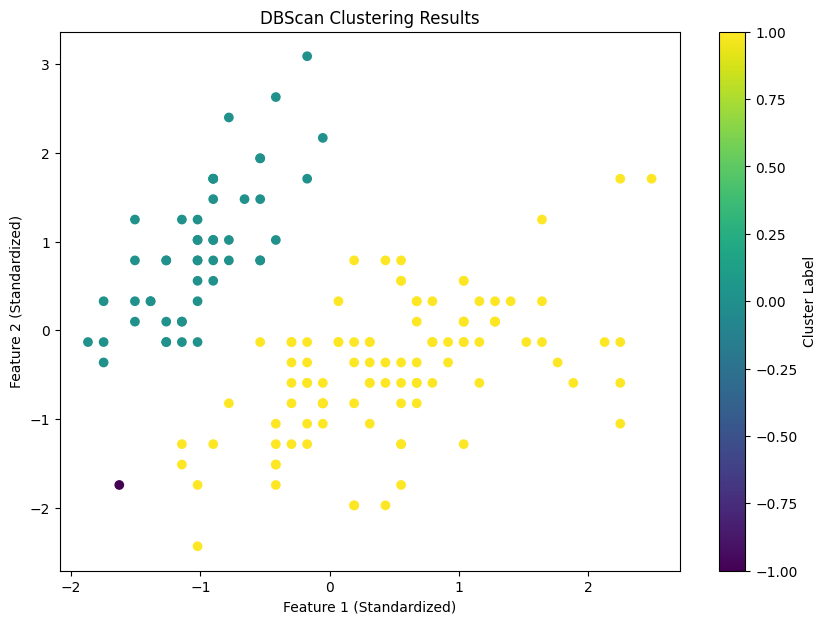

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=1.2, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)


# Calculate Silhouette Score
if len(set(clusters)) > 1:  
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print(f'Silhouette Score: {silhouette_avg:.2f}')
else:
    print('Silhouette Score cannot be calculated, only one cluster detected.')

# Visualize Clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('DBScan Clustering Results')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.colorbar(label='Cluster Label')
plt.show()



In [82]:
user_input = np.array([[5.1, 3.5, 1.4, 0.2]])
user_input_scaled = scaler.transform(user_input)
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(X_scaled)
distances, indices = neigh.kneighbors(user_input_scaled)
nearest_point_cluster = clusters[indices[0][0]]
print(f'User-defined input belongs to cluster: {nearest_point_cluster}')


User-defined input belongs to cluster: 0


***...K PROTOTYPE...***

In [2]:
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from kmodes.kprototypes import KPrototypes

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['species']=iris.target
iris_df['species']=iris_df['species'].astype('category')
categorical_index = iris_df.columns.get_loc('species')

In [28]:
n_clusters = 2
kproto = KPrototypes(n_clusters=n_clusters,init='Huang',verbose=0)
clusters= kproto.fit_predict(iris_df,categorical=[categorical_index])
print("Clusters centroids:",kproto.cluster_centroids_)

Clusters centroids: [[5.00566038 3.36981132 1.56037736 0.29056604 0.        ]
 [6.30103093 2.88659794 4.95876289 1.69587629 2.        ]]


In [29]:
silhoutte_avg = silhouette_score(iris_df,clusters)
print("silhoutte score",silhoutte_avg)

silhoutte score 0.6729912973532646
